In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import morphs
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
folder = morphs.paths.FIGURES_DIR / "psychometrics"

In [3]:
behavior_df = morphs.load.behavior_df()
morphs.data.parse.stim_id(behavior_df)
behavior_df = morphs.data.parse.behav_data_inverted(behavior_df)

In [4]:
len(behavior_df)

5567457

In [5]:
behavior_df.groupby("subj").agg("count")["response"]

subj
B1082    1280159
B1088     545599
B1101     321631
B1105    1541406
B1107     111549
B1218     449423
B1222    1248989
B979       68701
Name: response, dtype: int64

In [6]:
behavior_df = behavior_df[behavior_df["type_"] == "normal"]

In [7]:
subj = "B1082"
reduced_behavior_df = behavior_df[
    (behavior_df["subj"] == subj) & (behavior_df["morph_dim"] == "ae")
]

In [8]:
sns.set_context("talk")

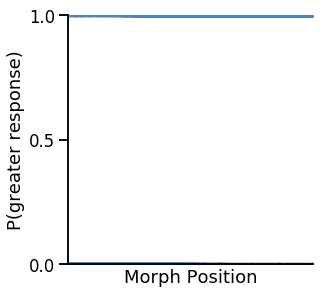

In [9]:
g = morphs.plot.psychometric.grid(
    reduced_behavior_df,
    legend=False,
    fit_reg=False,
    x_bins=None,
    scatter_kws={"alpha": 0.05, "s": 7},
    sub_title="",
)

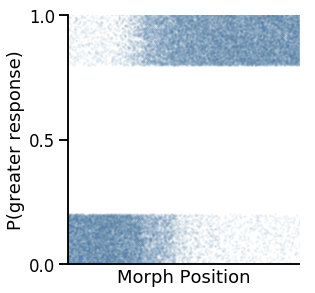

In [10]:
g = morphs.plot.psychometric.grid(
    reduced_behavior_df,
    legend=False,
    fit_reg=False,
    x_bins=None,
    y_jitter=0.2,
    x_jitter=0.5,
    sub_title="",
    scatter_kws={"alpha": 0.05, "s": 3},
)

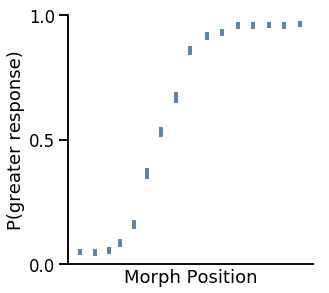

In [11]:
g = morphs.plot.psychometric.grid(
    reduced_behavior_df, legend=False, fit_reg=False, x_bins=16, sub_title=""
)

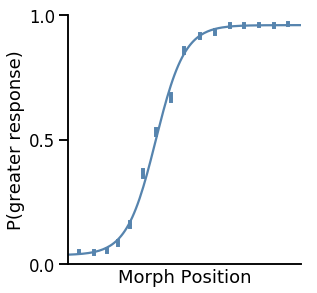

In [12]:
g = morphs.plot.psychometric.grid(
    reduced_behavior_df, legend=False, x_bins=16, sub_title=""
)

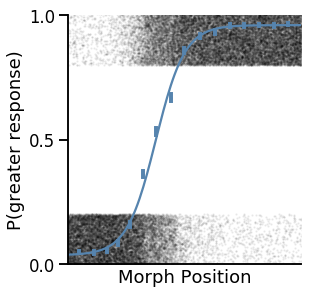

In [13]:
g = morphs.plot.psychometric.grid(
    reduced_behavior_df, legend=False, x_bins=16, sub_title=""
)
line = g.ax.plot(
    reduced_behavior_df["morph_pos"].values
    + np.random.uniform(-0.5, 0.5, len(reduced_behavior_df)),
    reduced_behavior_df["greater_response"].values.astype(np.float)
    + np.random.uniform(-0.2, 0.2, len(reduced_behavior_df)),
    "k.",
    alpha=0.05,
    markersize=3,
    zorder=1,
)
morphs.plot.savefig(g, "psyc-single-density", folder=folder)

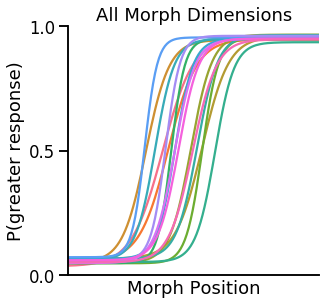

In [14]:
hue_order = np.sort(behavior_df[behavior_df["subj"] == subj]["morph_dim"].unique())
g = morphs.plot.psychometric.grid(
    behavior_df,
    col="subj",
    row=None,
    hue="morph_dim",
    hue_order=hue_order,
    col_order=[subj],
    legend=False,
    sub_title="All Morph Dimensions",
    legend_title="Morph Dimension",
    x_bins=None,
    scatter=False,
)
morphs.plot.savefig(g, "psyc-1subj-var", folder=folder)

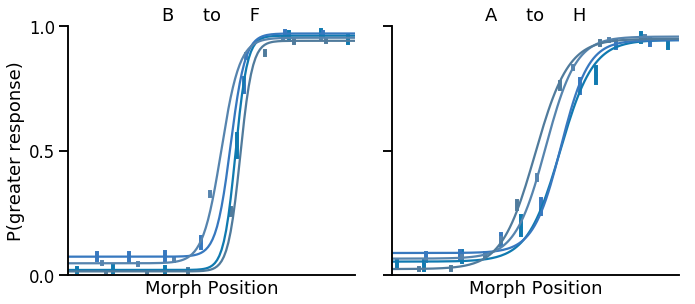

In [15]:
morph_dims = ["bf", "ah"]
g = morphs.plot.psychometric.grid(
    behavior_df,
    subjects=["B979", "B1107", "B1082", "B1218"],
    col="morph_dim",
    row=None,
    col_order=morph_dims,
    sub_title="",
    legend=False,
)
for ax, title in zip(
    g.axes.flat, ["     to     ".join(morph_dim.upper()) for morph_dim in morph_dims]
):
    ax.set_title(title)
morphs.plot.savefig(g, "psyc-conserved-examples", folder=folder)

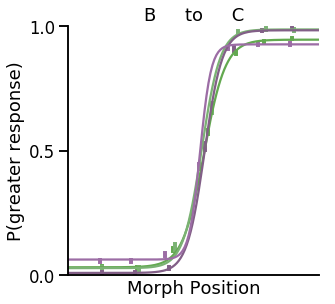

In [16]:
morph_dims = ["bc"]
g = morphs.plot.psychometric.grid(
    behavior_df,
    subjects=["B1222", "B1101", "B1088", "B1105"],
    col="morph_dim",
    row=None,
    col_order=morph_dims,
    sub_title="",
    legend=False,
)
for ax, title in zip(
    g.axes.flat, ["     to     ".join(morph_dim.upper()) for morph_dim in morph_dims]
):
    ax.set_title(title)
morphs.plot.savefig(g, "psyc-conserved-examples-2", folder=folder)

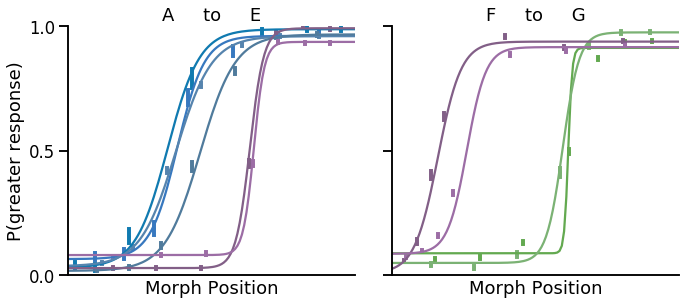

In [17]:
morph_dims = ["ae", "fg"]
g = morphs.plot.psychometric.grid(
    behavior_df,
    col="morph_dim",
    row=None,
    col_order=morph_dims,
    sub_title="",
    legend=False,
)
for ax, title in zip(
    g.axes.flat, ["     to     ".join(morph_dim.upper()) for morph_dim in morph_dims]
):
    ax.set_title(title)
morphs.plot.savefig(g, "psyc-shift-examples", folder=folder)

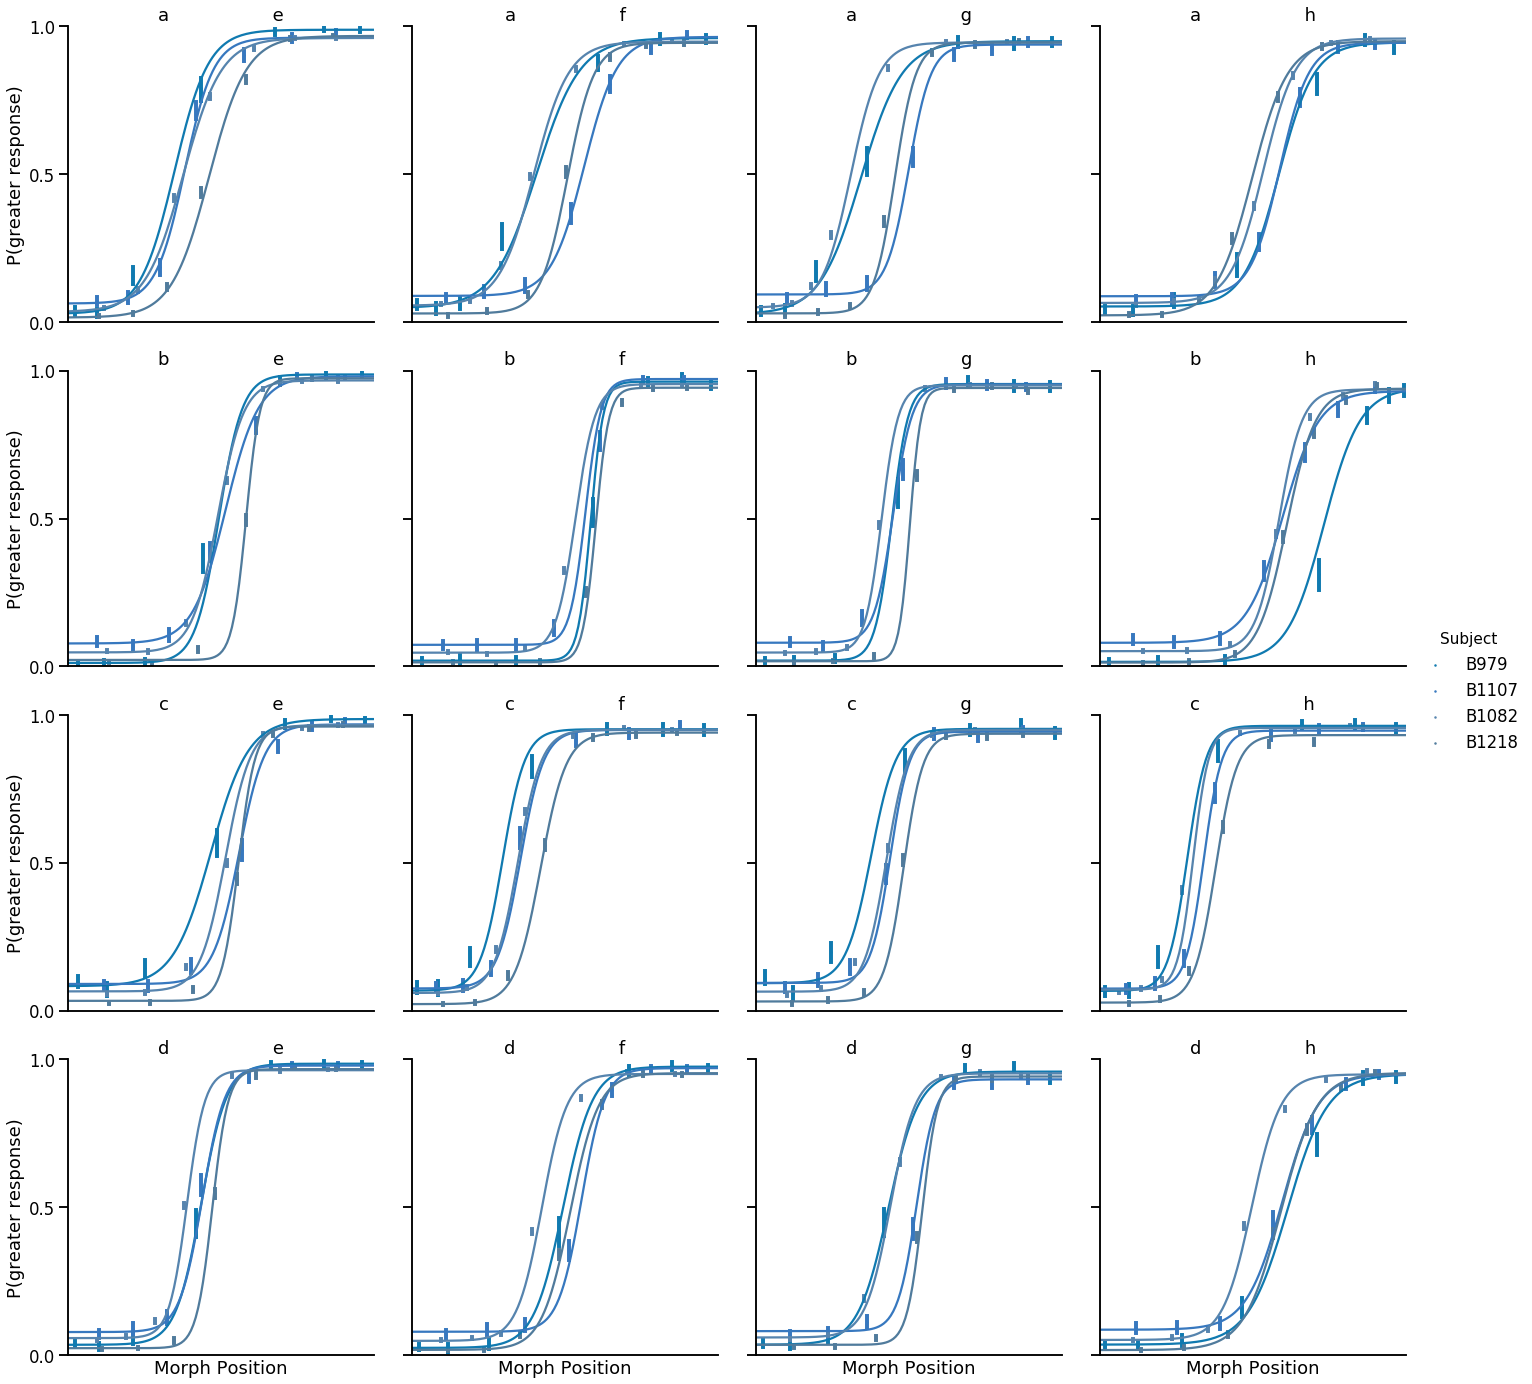

In [18]:
g = morphs.plot.psychometric.grid(
    behavior_df,
    subjects=["B979", "B1107", "B1082", "B1218"],
    col_order="efgh",
    row_order="abcd",
)
morphs.plot.savefig(g, "psyc-orig-4x4", folder=folder)

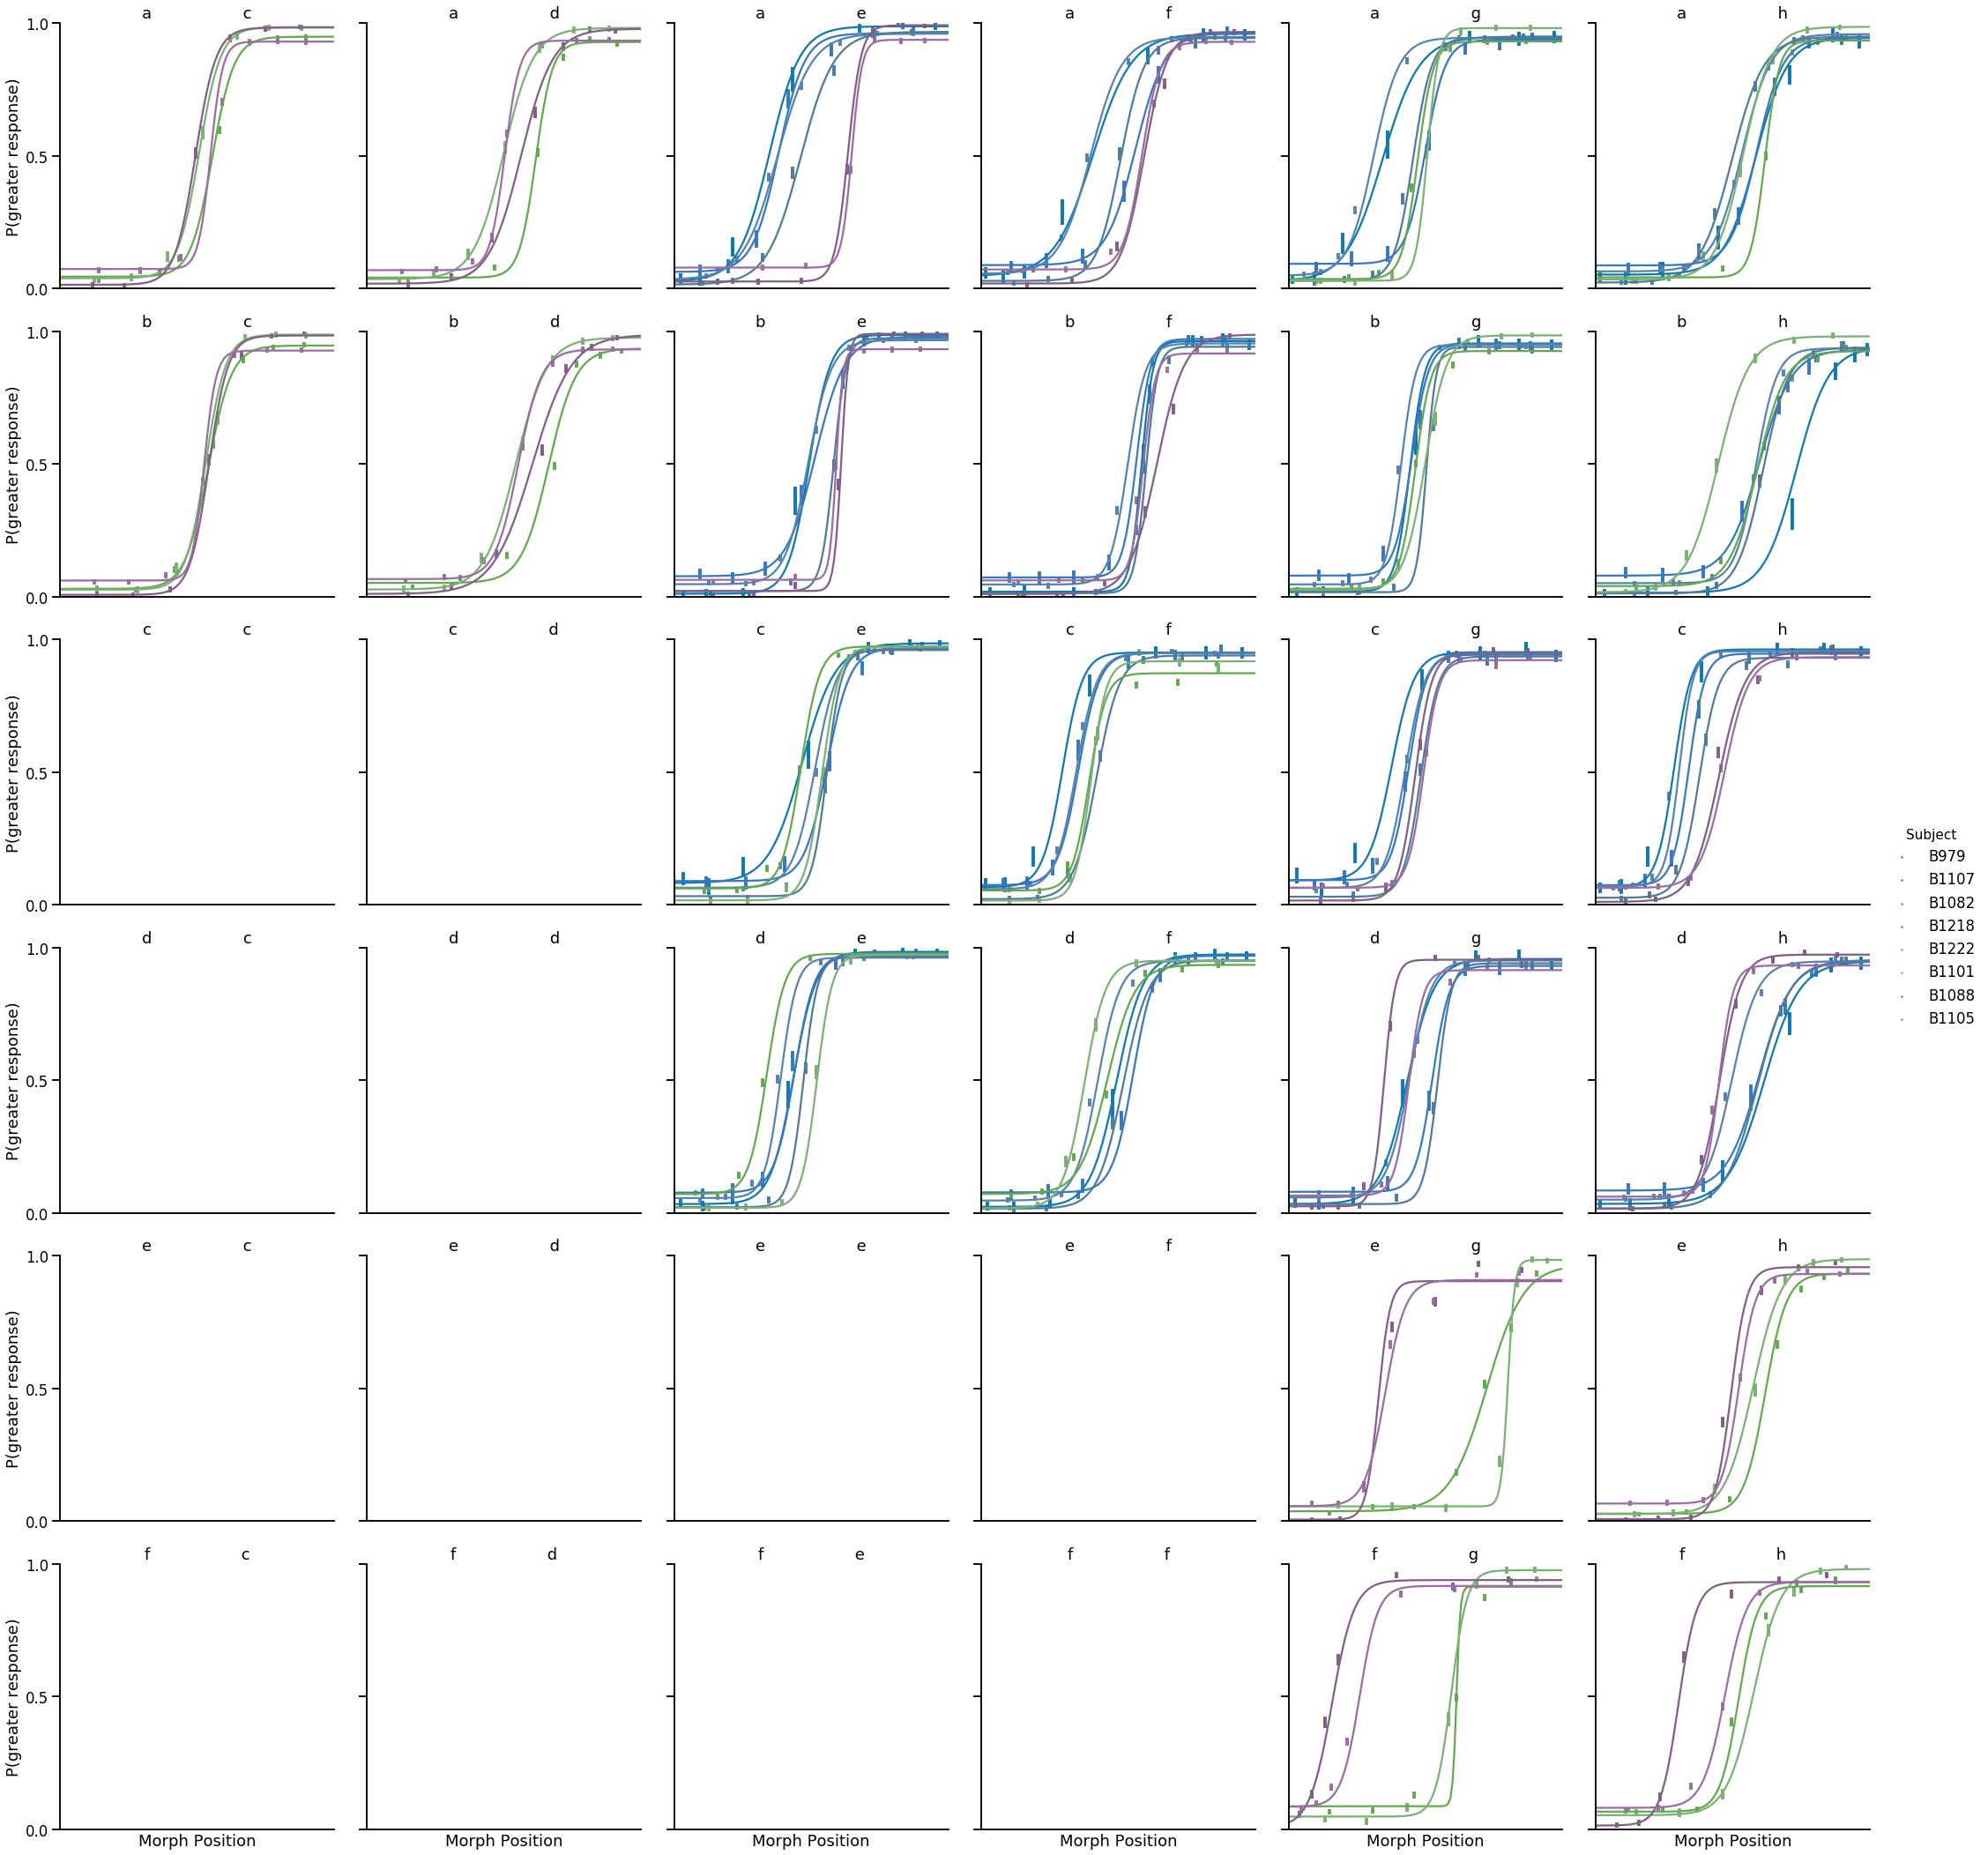

In [19]:
# NBVAL_SKIP
g = morphs.plot.psychometric.grid(behavior_df)
morphs.plot.savefig(g, "psyc-all", folder=folder)